## pandas Series 데이터 생성하기

In [5]:
import numpy as np
import pandas as pd

### Series
- pandas의 기본 객체 중 하나
- numpy의 ndarray를 기반으로 인덱싱을 기능을 추가하여 1차원 배열을 나타냄
- index를 지정하지 않을 시, 기본적으로 ndarray와 같이 0-based 인덱스 생성, 지정할 경우 명시적으로 지정된 index를 사용
- 같은 타입의 0개 이상의 데이터를 가질 수 있음

- data로만 생성하기
    - index는 기본적으로 0부터 자동적으로 생성

In [6]:
s1 = pd.Series([1,2,3])
s1

0    1
1    2
2    3
dtype: int64

In [7]:
s2 = pd.Series(['a', 'b', 'c'])
s2

0    a
1    b
2    c
dtype: object

In [8]:
s3 = pd.Series(np.arange(200))
s3

0        0
1        1
2        2
3        3
4        4
      ... 
195    195
196    196
197    197
198    198
199    199
Length: 200, dtype: int32

In [9]:
s4 = pd.Series([1,2,3],[100,200,300])
s4

100    1
200    2
300    3
dtype: int64

In [10]:
s5 = pd.Series([1,2,3],['a','b','c'])
s5

a    1
b    2
c    3
dtype: int64

In [11]:
s6 = pd.Series(np.arange(5), np.arange(100,105), dtype= np.int16)
s6

100    0
101    1
102    2
103    3
104    4
dtype: int16

### 인덱스 활용하기

In [12]:
s6.index

Int64Index([100, 101, 102, 103, 104], dtype='int64')

In [13]:
s6.values

array([0, 1, 2, 3, 4], dtype=int16)

1. 인덱스를 통한 데이터 접근

In [14]:
s6[104]

4

2. 인덱스를 활용해여 멀티플한 값에 접근

In [15]:
s6[[100, 102,104]]


100    0
102    2
104    4
dtype: int16

3. 인덱스를 통한 데이터 업데이트

In [16]:
s6[104] = 70
s6.values

array([ 0,  1,  2,  3, 70], dtype=int16)

In [17]:
s6[108] = 'a'
s6[2] = 'b'
s6

100     0
101     1
102     2
103     3
104    70
108     a
2       b
dtype: object

4.  인덱스 재사용하기

In [18]:
s7 = pd.Series(np.arange(7), s6.index)
s7

100    0
101    1
102    2
103    3
104    4
108    5
2      6
dtype: int32

### Series 함수 활용해서 데이터 분석하기

In [19]:
import numpy as np
import pandas as pd

#### Series size, shape, unique, count, value, counts 함수
- size : 개수 반환
- shape : 튜플형태로 shape반환
- unique : 유일한 값만 ndarray로 반환
- count : NaN을 제외한 개수를 반환
- mean : NaN을 제외한 평균
- value_counts : NaN을 제외하고 각 값들의 빈도를 반환

In [20]:
s = pd.Series([1,1,2,1,2,2,2,1,1,3,3,4,5,5,6, np.NaN])
s

0     1.0
1     1.0
2     2.0
3     1.0
4     2.0
5     2.0
6     2.0
7     1.0
8     1.0
9     3.0
10    3.0
11    4.0
12    5.0
13    5.0
14    6.0
15    NaN
dtype: float64

In [21]:
len(s)

16

In [22]:
s.size

16

In [23]:
s.shape

(16,)

In [24]:
s.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6., nan])

In [25]:
s.count()

15

In [26]:
a = np.array([1,1,2,2,3,3,np.NaN])
a.mean()

b = pd.Series(a)
b.mean()

2.0

In [27]:
s.mean()

2.6

In [28]:
s.value_counts()

1.0    5
2.0    4
5.0    2
3.0    2
6.0    1
4.0    1
dtype: int64

#### head, tail 함수
- head :  상위 n개 출력 기본 5개
- tail : 하위 n개 출력 기본 5개

In [32]:
s.head(n = 7)

0    1.0
1    1.0
2    2.0
3    1.0
4    2.0
5    2.0
6    2.0
dtype: float64

In [34]:
s.tail(n=3)

13    5.0
14    6.0
15    NaN
dtype: float64

### 산술연산
- Series의 경우에도 스칼라와의 연산은 각 원소별로 스칼라와의 연산이 적용
- Series와으이 연산은 각 인덱스에 맞는 값끼리 연산이 적용
    - 이때. 인덱스의 pair가 맞지 않으면. 결과는 NaN

In [35]:
import numpy as np
import pandas as pd

#### 인덱스를 기준으로 연산

In [37]:
s1 = pd.Series([1,2,3,4],['a','b','c','d'])
s2 = pd.Series([6,3,2,1],['d','c','b','a'])
s1

a    1
b    2
c    3
d    4
dtype: int64

In [38]:
s2

d    6
c    3
b    2
a    1
dtype: int64

In [40]:
s1+s2 # 인덱스끼리 더한다

a     2
b     4
c     6
d    10
dtype: int64

In [43]:
s1**3

a     1
b     8
c    27
d    64
dtype: int64

In [44]:
s1 ** s2

a       1
b       4
c      27
d    4096
dtype: int64

In [50]:
s1['e'] = 2
print(s1**s2)
print(s2**s1)

a       1.0
b       4.0
c      27.0
d    4096.0
e       NaN
dtype: float64
a       1.0
b       4.0
c      27.0
d    1296.0
e       NaN
dtype: float64


### Boolean selection
- boolean Series가 []와 함께 사용되면 True값에 해당하는 값만 새로 반환되는 Seroes객체에 포함됨
- 다중조건의 경우, & | 사용해서 연결한다

In [56]:
import numpy as np
import pandas as pd

In [60]:
s = pd.Series(np.arange(10),np.arange(10)+1)


In [67]:
s_mask = s > 5 # s의 값에 대해 참거짓을 나눈다

In [68]:
s[s_mask]

7     6
8     7
9     8
10    9
dtype: int32

In [70]:
s.index > 5 # s의 인덱스에 대해 참거짓으로 나눈다

array([False, False, False, False, False,  True,  True,  True,  True,
        True])

In [73]:
s[(s>4)&(s.index<8)]

6    5
7    6
dtype: int32

In [74]:
(s >=7).sum()  # 참의 개수

3

In [75]:
(s[s>=7]).sum() #참인 인덱스의 합

24

### Series 값 변경
- 추가 및 업데이트 : 인덱스를 사용
- 삭제 : drop함수 이용

In [95]:
s = pd.Series(np.arange(100,105),['a','b','c','d','e'])

In [96]:
s['a'] = 1 # 업데이트

In [97]:
s['s'] = 2 # 추가

In [98]:
s.drop('s') # s자체는 보존, 삭제된 복사본 반환
s

a      1
b    101
c    102
d    103
e    104
s      2
dtype: int64

In [99]:
s.drop('s',inplace=True) # 객체 자체로 다룬다
s

a      1
b    101
c    102
d    103
e    104
dtype: int64

In [107]:
# s[['a','w']] = [1,100] 업데이트와 추가는 동시에 안됨 
s[['a','b']] = [1,2] # 업데이트는 동시에 가능
#s[['q','w']] = [0,0] # 추가도 동시에 불가능
s

a      1
b      2
c    102
d    103
e    104
dtype: int64

### slicing
- 리스트, ndarray와 동일하게 적용

In [108]:
s1 = pd.Series(np.arange(100,105))

In [109]:
s1[1:3]

1    101
2    102
dtype: int32

In [112]:
s2 = pd.Series(np.arange(100,105),['a','t','c','d','e'])

In [113]:
s2[1:3] #마지막 인데스는 생략

t    101
c    102
dtype: int32

In [115]:
s2['t':'d'] # 문자열인 경우 마지막 인덱스까지 반환

t    101
c    102
d    103
dtype: int32

### Dataframe
- series가 1 차원이라면 dataframe은 2차원으로 확대된 버전
- excel spreadsheet이라고 생각하면 이해하기 쉽다
- 2차원이기 때문에 인덱스가 row, column로 구성되어있다
    - row는 각 개별 데이터, column은 개별 속성을 의미
- data analysis, machine learning에서 data 변형을 위해 가장 많이 사용

In [2]:
import pandas as pd
# 자료 출처 https://www.kaggle.com/hesh97/titanicdataset-traincsv
train_data = pd.read_csv('./train.csv')

#### head, tail 함수
- 데이터 전체가 아닌, 일부(처음부터, 혹은 마지막부터)를 간단히 보기 위한 함수

In [4]:
train_data.head(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### dataframe 데이터 파악하기
- shape 속성 (row, column)
- describe 함수 - 숫자형 데이터의 통계치 계산
- info 함수 - 데이터 타입, 각 아이템의 개수 등 출력


In [6]:
train_data.shape

(891, 12)

In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 인덱스
- index 속성
- 각 아이템을 특정할 수 있는 고유의 값을 저장
- 복작합 데이터의 경우, 멀티 인덱스로 표현 가능

In [10]:
train_data.index

RangeIndex(start=0, stop=891, step=1)

### Column
- columns -> 속성
- 각각의 특성(feature)을 나타냄
- 복잡한 데이터의 경우, 멀티 컬럼으로 표현 가능하다 

In [11]:
 train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### dataframe 생성하기
- 일반적으로 분석을 위한 데이터는 다른 데이터 소스(database, 일부 파일)을 통해 dataframe을 생성
- 여기서는 실습을 통해, dummy 데이터를 생성하는 방법을 다룬다

In [15]:
data = { 'a' : 100, 'b' : 200, 'c' : [300,200,100] }
pd.DataFrame(data, index = [ 'x' , 'y ' , 'z' ] )

,a,b,c
x,100,200,300
y,100,200,200
z,100,200,100


In [21]:
a = pd.Series( [ 100 , 200 , 300 ] , ['a', 'b', 'c' ] )
b = pd.Series( [ 101 , 201  , 301 ] , ['a' , 'b' , 'c' ] )
c = pd.Series( [ 102 , 202 , 302] , ['a' , 'b' , 'c' ] )
d = pd.Series( [ 102 , 202 , 302] , ['a' , 'f' , 'h' ] )

pd.DataFrame( [a , b , c , d ] , index = [100 , 101 , 102 , 103] )

,a,b,c,f,h
100,100.0,200.0,300.0,NaN,NaN
101,101.0,201.0,301.0,NaN,NaN
102,102.0,202.0,302.0,NaN,NaN
103,102.0,NaN,NaN,202.0,302.0


### csv 데이터로부터 dataframe 생성
- 데이터 분석을 위해, dataframe을 생성하는 가장 일반적인 방법
- 데이터 소스로부터 추출된 csv(comma separated values) 파일로부터 생성
- pandas.read_csv 함수 사용한다

In [28]:
import pandas as pd
# 자료 출처 https://www.kaggle.com/hesh97/titanicdataset-traincsv
train_data = pd.read_csv('./train.csv')

#### read_csv 함수 파라미터
- sep - 각 데이터 값을 구별하기 위한 구분자(separator) 설정
- header - header를 무시할 경우 , None 설정
- index_col - index로 사용할 column 설정
- usecols - 실제로  dataframe에 로딩할  columns만 설정

In [33]:
train_data1 = pd.read_csv( './train.csv' , sep = '#')
train_data2 = pd.read_csv( './train.csv' , header = None)
train_data3 = pd.read_csv( './train.csv' , index_col = 'PassengerId')
train_data4 = pd.read_csv( './train.csv' , usecols = { 'PassengerId', 'Survived', 'Pclass','Name'})

In [35]:
train_data1.head(n=3) 

,"PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked"
0,"1,0,3,""Braund, Mr. Owen Harris"",male,22,1,0,A/..."
1,"2,1,1,""Cumings, Mrs. John Bradley (Florence Br..."
2,"3,1,3,""Heikkinen, Miss. Laina"",female,26,0,0,S..."


In [36]:
train_data2.head(n=3)

,0,1,2,3,4,5,6,7,8,9,10,11
0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C


In [37]:
train_data3.head(n=3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [38]:
train_data4.head(n=3)

,PassengerId,Survived,Pclass,Name
0,1,0,3,"Braund, Mr. Owen Harris"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,"Heikkinen, Miss. Laina"


### column  선택하기
- 기본적으로 []는 column을 추출
- 컬럼 인덱스일 경우 인덱스의 리스트 사용 가능
    - 리스트를 전달할 경우 결과는 dataframe
    - 하나의 컬럼며을 전달할 경우 결과는 series이다

In [47]:
train_data[ 'PassengerId' ].head(n = 3) # series 타입으로 반환한다

0    1
1    2
2    3
Name: PassengerId, dtype: int64

In [46]:
train_data[ [ 'PassengerId' ] ].head(n=3) # dataframe 타입으로 반환한다

,PassengerId
0,1
1,2
2,3


In [50]:
train_data[ ['PassengerId' , 'Survived' , 'Age' ] ]

,PassengerId,Survived,Age
0,1,0,22.0
1,2,1,38.0
2,3,1,26.0
3,4,1,35.0
4,5,0,35.0
...,...,...,...
886,887,0,27.0
887,888,1,19.0
888,889,0,NaN
889,890,1,26.0


### dataframe slicing
- dataframe의 경우 기본적으로 [] 연산자가 column 선택에 사용된다
- 하지만 slicing은 row 레벨로 지원된다

In [52]:
train_data[ : 3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### row 선택하기
- series의 경우 []로 row 선택이 가능하나, dataframe의 경우 기본적으로 column을 선택하도록 설계되어있다
- .loc, .iloc로 row 선택
    - loc - 인덱스 자체를 사용 -> 인덱스를 사용
    - iloc - 0based index로 사용 -> 순서대로 가져올때
    - 이 두 함수는 ,를 사용하여 column 선택도 가능하다

In [55]:
import numpy as np

In [66]:
train_data.index = np.arange(100, 991)

In [67]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
100,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
101,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
102,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
103,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
104,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
train_data.loc[ [101 , 104 ] ] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
101,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
104,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
train_data.iloc[ [ 1 , 4 ] ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
101,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
104,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### row, column 동시에 선택하기
- loc, iloc 속성을 이용할 때, 콤마를 이용하여 둘 다 명시 가능

In [81]:
train_data.loc[ [ 101 , 104 ] , [ 'PassengerId' , 'Survived' , 'Name' ] ]

,PassengerId,Survived,Name
101,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
104,5,0,"Allen, Mr. William Henry"


In [89]:
train_data.iloc[ [ 1 , 4 ] , [ 0 , 1 , 3 ] ] # 전부 0 based

,PassengerId,Survived,Name
101,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
104,5,0,"Allen, Mr. William Henry"


### boolean selection 으로 row 선택하기
- numpy에서와 동일한 방법으로 해당 조건에 맞는 row만 선택

In [113]:
import pandas as pd
# 자료 출처 https://www.kaggle.com/hesh97/titanicdataset-traincsv
train_data = pd.read_csv('./train.csv')

In [114]:
import numpy as np

#### 30대 이면서 1등석 탄 사람 선택하기

In [115]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
class_ = train_data['Pclass'] == 1 
age_ = (train_data['Age'] >= 30) & (train_data['Age'] <40)
train_data[class_ & age_ ].head(n = 3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN


### 새 컬럼 추가하기
- [] 사용해서 추가하기
- insert 함수를 사용해서 원하는 위치에 추가하기

In [136]:
train_data[ 'Age_double' ] = train_data[ 'Age' ]  * 2 # 맨 마지막에 컬럼이 추가된다
train_data.head( n = 3 )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_double
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,44.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,76.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,52.0


In [137]:
train_data.insert(3, 'Fare10', train_data[ 'Fare' ] / 10 ) # 3번째 자리에 삽입한다
train_data.head( n = 3)

,PassengerId,Survived,Pclass,Fare10,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_double
0,1,0,3,0.72500,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,44.0
1,2,1,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,76.0
2,3,1,3,0.79250,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,52.0


### 컬럼 삭제하기
- drop 함수 사용하여 삭제
    - 리스트를 사용하여 멀티플 삭제 가능

In [138]:
train_data.drop( 'Age_double', axis = 1).head(n=3) # 복사본을 반환 -> 원본은 그대로 있다

,PassengerId,Survived,Pclass,Fare10,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0.72500,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,0.79250,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [139]:
train_data.drop( ['Age_double', 'Fare10'], axis = 1).head( n = 3 )  #복사본을 반환 -> 원본은 그대로 있다

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [140]:
train_data.drop( ['Age_double', 'Fare10'], axis = 1, inplace = True) #원본을 삭제한 경우
train_data.head(n = 3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 변수(column) 사이의 상관계수(correlation)
- corr함수를 통해 상관계수 연산 ( -1, 1 사이의 결과 )
    - 연속성( 숫자형 ) 데이터에 대해서만 연산
    - 인과관계를 의미하진 않다

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [147]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


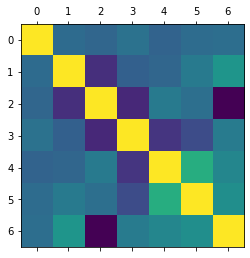

In [149]:
plt.matshow(train_data.corr()) # 색이 밝을 수록 상관관계가 높다

### NaN 값 확인
- info 함수를 통하여 계수 확인
- isna 함수를 통해 boolean 타입으로 확인

In [151]:
train_data.info() # RangeIndex 891개의 행이 있다.  Age , Cabin, Embarked은 데이터 누락이 있다 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [153]:
train_data.isna() #True 인 경우는 값이 NaN이다

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [155]:
train_data[ [ 'Age', 'Cabin' ] ].isna()

,Age,Cabin
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True
...,...,...
886,False,True
887,False,False
888,True,True
889,False,False


### NaN 처리 방법
- 데이터에서 삭제
    - dropna 함수 사용
- 다른 값으로 치환
    - fillna 함수

In [206]:
train_data.dropna().head() # NaN인 데이터 모두 삭제

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [207]:
train_data.dropna(subset = [ 'Age' ] ).tail() # 특정 컬럼만 지우기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [208]:
train_data.dropna(axis = 1).head() # 컬럼중 하나라도 NaN이 있다면 열을 지운다

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


#### NaN 값 대체하기 나이에 관하여
- 평균으로 대체하기
- 생존자/사망자 별 평균으로 대체하기

In [209]:
train_data[ 'Age' ].fillna( train_data[ 'Age' ].mean( ) )

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [210]:
mean1 = train_data[ train_data[ 'Survived' ] == 1 ][ 'Age' ].mean() # 생존자 나이 평균

mean2 = train_data[ train_data[ 'Survived' ] == 0 ][ 'Age' ].mean() # 사망자 나이 평균

print(mean1, mean2)

28.343689655172415 30.62617924528302


In [211]:
train_data.loc[ train_data[ 'Survived' ] == 1 , 'Age' ] = train_data[ train_data[ 'Survived' ] == 1 ][ 'Age' ].fillna(mean1)
train_data.loc[ train_data[ 'Survived' ] == 0 , 'Age' ] = train_data[ train_data[ 'Survived' ] == 0 ][ 'Age' ].fillna(mean2)
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.626179,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,NaN,Q


### info 함수로 각 변수의 데이터 타입 확인
- 타입 변경은 astype 함수 상용

In [347]:
import pandas as pd
# 자료 출처 https://www.kaggle.com/hesh97/titanicdataset-traincsv
train_data = pd.read_csv('./train.csv')

In [348]:
train_data.info() # 문자열 : Object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 숫자형(Numerical Type) 데이터
- 연속성을 띄는 숫자로 이루어진 데이터
    - 예) Age, Fare 등
 

### 범주형( Categorical Type) 데이터
- 연속적이지 않은 값 (대부분의 경우 숫자를 제외한 나머지 값)을 갖는 데이터를 의미
    - 예) name, sex, ticket, cabin, embarked
- 어떤 경우, 숫자형 타입이라 할지라도 개념적으로 범주형으로 처리해야할 경우가 있음
    - 예) pclass

### Pclass 변수 변환하기
- astype 사용하여 간단히 타입만 변환

In [349]:
train_data[ 'Pclass' ] = train_data['Pclass'].astype(str)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


### Age 변수 변환하기 -> 범주화 하기
- 변환 로직을 함수로 만든 후, apply 함수로 적용

In [350]:
import math

In [351]:
def age_categorize(age):
    if math.isnan(age) : 
        return -1
    return math.floor( age / 10)  * 10   

In [352]:
train_data[ 'Age'].apply(age_categorize)

0      20
1      30
2      20
3      30
4      30
       ..
886    20
887    10
888    -1
889    20
890    30
Name: Age, Length: 891, dtype: int64

### 범주형 데이터 전처리 하기 -> One-hot-encoding
- 범주형 데이터는 분석단계에서 계산이 어렵기 때문에 숫자형으로 변경이 필요함
- 범주형 데이터는 각 범주(category)를 column레벨로 변경
- 해당 범주에 해당하면 1, 아니면 0으로 채우는 인코딩 기법
- pandas.get_dummies 함수 사용
    - drop_first : 첫번째 카테고리 값은 사용하지 않음
    

In [353]:
pd.get_dummies(train_data, columns = [ 'Pclass', 'Sex', 'Embarked' ] , drop_first = False)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,1,0,0,1,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1,0,0,1,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1,1,0,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,0,0,0,1,1,0,0


In [354]:
pd.get_dummies(train_data, columns = [ 'Pclass', 'Sex', 'Embarked' ] , drop_first = True)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,0,1,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,1,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,0,1,0,0


### group by
- 아래의 세 단계를 적용하여 데이터를 그룹화 (groupping) ( SQL의 group by 와 개념적으로 동일, 사용법은 유사)
    - 데이터 분할
    - operatioin 적용
    - 데이터 병합

In [355]:
df = pd.read_csv('./train.csv')
# 자료 출처 https://www.kaggle.com/hesh97/titanicdataset-traincsv
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### GroupBy groups 속성
- 각 그룹과 그룹에 속한 index를 dict 형태로 변환

In [356]:
class_group_pclass = df.groupby( 'Pclass')
class_group_pclass

In [357]:
class_group_pclass.groups

{1: Int64Index([  1,   3,   6,  11,  23,  27,  30,  31,  34,  35,
             ...
             853, 856, 857, 862, 867, 871, 872, 879, 887, 889],
            dtype='int64', length=216),
 2: Int64Index([  9,  15,  17,  20,  21,  33,  41,  43,  53,  56,
             ...
             848, 854, 861, 864, 865, 866, 874, 880, 883, 886],
            dtype='int64', length=184),
 3: Int64Index([  0,   2,   4,   5,   7,   8,  10,  12,  13,  14,
             ...
             875, 876, 877, 878, 881, 882, 884, 885, 888, 890],
            dtype='int64', length=491)}

In [358]:
class_group_sex = df.groupby( 'Sex')
class_group_sex.groups

{'female': Int64Index([  1,   2,   3,   8,   9,  10,  11,  14,  15,  18,
             ...
             866, 871, 874, 875, 879, 880, 882, 885, 887, 888],
            dtype='int64', length=314),
 'male': Int64Index([  0,   4,   5,   6,   7,  12,  13,  16,  17,  20,
             ...
             873, 876, 877, 878, 881, 883, 884, 886, 889, 890],
            dtype='int64', length=577)}

### groupping 함수
- 그룹 데이터에 적용 가능한 통계 함수(NaN은 제외하여 연산)
- count - 데이터 개수
- sum - 데이터의 합
- mean, std, var - 평균 표쥰편차 분산
- min, max - 최소 최대값

In [359]:
class_group_pclass.count() # age, cabin embarked에 NaN이 있어서 count에서 제외됨을 알 수 있다

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [360]:
class_group_pclass.mean()[ ['Age', 'Survived']]

,Age,Survived
Pclass,,
1,38.233441,0.629630
2,29.877630,0.472826
3,25.140620,0.242363


#### 성별에 따른 생존률 구하기

In [361]:
df.groupby('Sex').mean()['Survived']*100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

### 복수 columns로 groupping 하기
- groupby에 column 리스트를 전달
- 통계함수를 적용한 결과는 multiindex를 갖는 dataframe

In [362]:
df.groupby( [ 'Pclass' , 'Sex' ] ).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

In [363]:
df.groupby( [ 'Pclass' , 'Sex' ] ).mean().index

MultiIndex([(1, 'female'),
            (1,   'male'),
            (2, 'female'),
            (2,   'male'),
            (3, 'female'),
            (3,   'male')],
           names=['Pclass', 'Sex'])

In [364]:
df.groupby( [ 'Pclass' , 'Sex' ] ).mean().loc[2, 'female']

PassengerId    443.105263
Survived         0.921053
Age             28.722973
SibSp            0.486842
Parch            0.605263
Fare            21.970121
Name: (2, female), dtype: float64

#### 클래스와 성별에 따른 생존율 구하기

In [365]:
df.groupby( [ 'Pclass' , 'Sex' ] ).mean()['Survived']

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

### index를 이용한 group by
- index가 있는 경우, groupby 함수에 level 사용 가능
    - level은 index의 depth를 의미하며, 가장 왼쪽부터 0부터 증가
- set_index 함수
    - column 데이터를  index 레벨로 변경
- reset_index 함수
    - 인덱스를 초기화

In [366]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [367]:
df.set_index( [ 'Pclass' , 'Sex'] ).reset_index().head()

,Pclass,Sex,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
4,3,male,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S


In [368]:
df.set_index('Age').groupby(level=0).mean().head() # 아래와 동일

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
Age,,,,,,
0.42,804.0,1.0,3.0,0.0,1.0,8.5167
0.67,756.0,1.0,2.0,1.0,1.0,14.5000
0.75,557.5,1.0,3.0,2.0,1.0,19.2583
0.83,455.5,1.0,2.0,0.5,1.5,23.8750
0.92,306.0,1.0,1.0,1.0,2.0,151.5500


In [369]:
df.groupby(['Age']).mean().head() # 위와 동일

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
Age,,,,,,
0.42,804.0,1.0,3.0,0.0,1.0,8.5167
0.67,756.0,1.0,2.0,1.0,1.0,14.5000
0.75,557.5,1.0,3.0,2.0,1.0,19.2583
0.83,455.5,1.0,2.0,0.5,1.5,23.8750
0.92,306.0,1.0,1.0,1.0,2.0,151.5500


#### 나이대 별로 생존율 구하기

In [370]:
import math
def age_categorize(age):
    if math.isnan(age):
        return -1
    return math.floor(age/10)*10

In [371]:
df.set_index('Age').groupby(age_categorize).mean()['Survived']

-1     0.293785
 0     0.612903
 10    0.401961
 20    0.350000
 30    0.437126
 40    0.382022
 50    0.416667
 60    0.315789
 70    0.000000
 80    1.000000
Name: Survived, dtype: float64

### multiindex를 이용한 groupping


In [372]:
df.set_index( [ 'Pclass' , 'Sex' ] ).groupby(level = (0 , 1)).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

### aggregate(집계) 함수 사용
- groupby 결과에 집계함수를 적용하여 그룹별 데이터 확인 가능

In [373]:
df.set_index( [ 'Pclass' , 'Sex' ] ).groupby(level = (0 , 1)).aggregate( [np.mean, np.sum, np.max])

PassengerId               Survived                 Age           \
                     mean     sum amax      mean sum amax       mean      sum   
Pclass Sex                                                                      
1      female  469.212766   44106  888  0.968085  91    1  34.611765  2942.00   
       male    455.729508   55599  890  0.368852  45    1  41.281386  4169.42   
2      female  443.105263   33676  881  0.921053  70    1  28.722973  2125.50   
       male    447.962963   48380  887  0.157407  17    1  30.740707  3043.33   
3      female  399.729167   57561  889  0.500000  72    1  21.750000  2218.50   
       male    455.515850  158064  891  0.135447  47    1  26.507589  6706.42   

                        SibSp               Parch                  Fare  \
               amax      mean  sum amax      mean  sum amax        mean   
Pclass Sex                                                                
1      female  63.0  0.553191   52    3  0.457447   43    2  106.125798   
       male    80.0  0.311475   38    3  0.278689   34    4   67.226127   
2      female  57.0  0.486842   37    3  0.605263   46    3   21.970121   
       male    70.0  0.342593   37    2  0.222222   24    2   19.741782   
3      female  63.0  0.895833  129    8  0.798611  115    6   16.118810   
       male    74.0  0.498559  173    8  0.224784   78    5   12.661633   

                                    
                     sum      amax  
Pclass Sex                          
1      female  9975.8250  512.3292  
       male    8201.5875  512.3292  
2      female  1669.7292   65.0000  
       male    2132.1125   73.5000  
3      female  2321.1086   69.5500  
       male    4393.5865   69.5500

### transform 함수
- groupby 후 transform 함수를 사용하면 원래의  index를 유지한 상태로 통계함수를 적용
- 전체 데이터의 집계가 아닌 각 그룹에서의 집계를 계산
- 따라서 새로 생성된 데이터를 원본 dataframe과 합치기 쉬움

In [374]:
df.groupby( 'Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [375]:
df.groupby( 'Pclass').transform(np.mean)

,PassengerId,Survived,Age,SibSp,Parch,Fare
0,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550
3,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
4,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550
...,...,...,...,...,...,...
886,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
887,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
888,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550
889,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687


In [376]:
df[ 'Age2' ] = df.groupby( 'Pclass').transform(np.mean)['Age'] # 새로운 속성을 만든다
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,25.140620
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.233441
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,25.140620
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,38.233441
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,25.140620


In [377]:
df.groupby( [ 'Pclass', 'Sex']).transform(np.mean)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Age2
0,455.515850,0.135447,26.507589,0.498559,0.224784,12.661633,25.140620
1,469.212766,0.968085,34.611765,0.553191,0.457447,106.125798,38.233441
2,399.729167,0.500000,21.750000,0.895833,0.798611,16.118810,25.140620
3,469.212766,0.968085,34.611765,0.553191,0.457447,106.125798,38.233441
4,455.515850,0.135447,26.507589,0.498559,0.224784,12.661633,25.140620
...,...,...,...,...,...,...,...
886,447.962963,0.157407,30.740707,0.342593,0.222222,19.741782,29.877630
887,469.212766,0.968085,34.611765,0.553191,0.457447,106.125798,38.233441
888,399.729167,0.500000,21.750000,0.895833,0.798611,16.118810,25.140620
889,455.729508,0.368852,41.281386,0.311475,0.278689,67.226127,38.233441


In [379]:
df['Age3'] = df.groupby( [ 'Pclass' , 'Sex' ] ).transform(np.mean)['Age']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age2,Age3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,25.140620,26.507589
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.233441,34.611765
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,25.140620,21.750000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,38.233441,34.611765
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,25.140620,26.507589


In [380]:
df.drop(['Age2', 'Age3'], axis = 1 , inplace = True)

In [384]:
df.head(n=3) # 다시 속성 삭제

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### pivot
- dataframe의 형태를 변경
- 인덱스, 컬럼, 데이터로 사용할 컬럼을 명시

In [14]:
import pandas as pd
import numpy as np

In [15]:
df = pd.DataFrame( {
    '지역' : [ '서울' , '서울' , '서울' , '경기' , '경기' , '부산' , '서울' , '서울' , '부산' , '경기' , '경기' , '경기' ] ,
    '요일' : [ '월요일' , '화요일' , '수요일' , '월요일' , '화요일' , '월요일' , '목요일' , '금요일' , '화요일' , '수요일' , '목요일' , '금요일' ],
    '강수량' : [ 100 , 80 , 1000 , 200 , 200 , 100 , 50 , 100 , 200 , 100 , 50 ,100 ],
    '강수확률' : [ 90 , 70 , 90 , 10 , 20 , 30 , 50 , 90 , 20 , 80 , 50 , 10 ] 
                } )
df # 지역과 요일이 같은 컬럼 레벨로 올라가 있다

,지역,요일,강수량,강수확률
0,서울,월요일,100,90
1,서울,화요일,80,70
2,서울,수요일,1000,90
3,경기,월요일,200,10
4,경기,화요일,200,20
5,부산,월요일,100,30
6,서울,목요일,50,50
7,서울,금요일,100,90
8,부산,화요일,200,20
9,경기,수요일,100,80


In [16]:
df.pivot('지역' , '요일', ) # 인덱스 컬럼 순

강수량                              강수확률                        
요일    금요일   목요일     수요일    월요일    화요일   금요일   목요일   수요일   월요일   화요일
지역                                                                 
경기  100.0  50.0   100.0  200.0  200.0  10.0  50.0  80.0  10.0  20.0
부산    NaN   NaN     NaN  100.0  200.0   NaN   NaN   NaN  30.0  20.0
서울  100.0  50.0  1000.0  100.0   80.0  90.0  50.0  90.0  90.0  70.0

In [17]:
df.pivot('요일' , '지역')

강수량                 강수확률            
지역      경기     부산      서울    경기    부산    서울
요일                                         
금요일  100.0    NaN   100.0  10.0   NaN  90.0
목요일   50.0    NaN    50.0  50.0   NaN  50.0
수요일  100.0    NaN  1000.0  80.0   NaN  90.0
월요일  200.0  100.0   100.0  10.0  30.0  90.0
화요일  200.0  200.0    80.0  20.0  20.0  70.0

### pivot_table
- 기능적으로 pivot과 동일
- pivot과의 차이점
    - 중복되는 모호한 값이 있을 경우, aggregation 함수 사용하여 값을 채움

In [18]:
df = pd.DataFrame( {
    '지역' : [ '서울' , '서울' , '서울' , '경기' , '경기' , '부산' , '서울' , '서울' , '부산' , '경기' , '경기' , '경기' ] ,
    '요일' : [ '월요일' , '월요일' , '수요일' , '월요일' , '화요일' , '월요일' , '목요일' , '금요일' , '화요일' , '수요일' , '목요일' , '금요일' ],
    '강수량' : [ 100 , 80 , 1000 , 200 , 200 , 100 , 50 , 100 , 200 , 100 , 50 ,100 ],
    '강수확률' : [ 90 , 70 , 90 , 10 , 20 , 30 , 50 , 90 , 20 , 80 , 50 , 10 ] 
                } )
df # 지역과 요일이 같은 컬럼 레벨로 올라가 있다 
# 서울 월요일 데이터가 중복되어있다

,지역,요일,강수량,강수확률
0,서울,월요일,100,90
1,서울,월요일,80,70
2,서울,수요일,1000,90
3,경기,월요일,200,10
4,경기,화요일,200,20
5,부산,월요일,100,30
6,서울,목요일,50,50
7,서울,금요일,100,90
8,부산,화요일,200,20
9,경기,수요일,100,80


In [25]:
# pivot 함수로는 중복 허용 X
pd.pivot_table(df , index = '요일' , columns = '지역' , aggfunc = np.mean )

강수량                 강수확률            
지역      경기     부산      서울    경기    부산    서울
요일                                         
금요일  100.0    NaN   100.0  10.0   NaN  90.0
목요일   50.0    NaN    50.0  50.0   NaN  50.0
수요일  100.0    NaN  1000.0  80.0   NaN  90.0
월요일  200.0  100.0    90.0  10.0  30.0  80.0
화요일  200.0  200.0     NaN  20.0  20.0   NaN

### Stack & unstack
- stack : 컬럼 레벨에서 인덱스 레벨로 dataframe 변경
    - 즉, 데이터를 쌓올리는 개념으로 이해함
- unstack : 인덱스 레벨에서 컬럼 레벨로 dataframe 변경
    - stack의 반대 operation
- 둘은 역의 관계

In [26]:
df = pd.DataFrame( {
    '지역' : [ '서울' , '서울' , '서울' , '경기' , '경기' , '부산' , '서울' , '서울' , '부산' , '경기' , '경기' , '경기' ] ,
    '요일' : [ '월요일' , '화요일' , '수요일' , '월요일' , '화요일' , '월요일' , '목요일' , '금요일' , '화요일' , '수요일' , '목요일' , '금요일' ],
    '강수량' : [ 100 , 80 , 1000 , 200 , 200 , 100 , 50 , 100 , 200 , 100 , 50 ,100 ],
    '강수확률' : [ 80 , 70 , 90 , 10 , 20 , 30 , 50 , 90 , 20 , 80 , 50 , 10 ] 
                } )
df # 지역과 요일이 같은 컬럼 레벨로 올라가 있다

,지역,요일,강수량,강수확률
0,서울,월요일,100,80
1,서울,화요일,80,70
2,서울,수요일,1000,90
3,경기,월요일,200,10
4,경기,화요일,200,20
5,부산,월요일,100,30
6,서울,목요일,50,50
7,서울,금요일,100,90
8,부산,화요일,200,20
9,경기,수요일,100,80


In [28]:
new_df = df.set_index( [ '지역' , '요일'])
new_df

강수량  강수확률
지역 요일             
서울 월요일   100    80
   화요일    80    70
   수요일  1000    90
경기 월요일   200    10
   화요일   200    20
부산 월요일   100    30
서울 목요일    50    50
   금요일   100    90
부산 화요일   200    20
경기 수요일   100    80
   목요일    50    50
   금요일   100    10

In [31]:
new_df.unstack(0) # 0번 레벨에 있는 인덱스를 컬럼으로 올린다 현재 컬럼 레벨 : 0 강수량, 강수확율 , 1 경기 부산 서울

강수량                 강수확률            
지역      경기     부산      서울    경기    부산    서울
요일                                         
금요일  100.0    NaN   100.0  10.0   NaN  90.0
목요일   50.0    NaN    50.0  50.0   NaN  50.0
수요일  100.0    NaN  1000.0  80.0   NaN  90.0
월요일  200.0  100.0   100.0  10.0  30.0  80.0
화요일  200.0  200.0    80.0  20.0  20.0  70.0

In [47]:
new_df.unstack(0).stack(1) # 지역을 인덱스 레벨에 스택한다 

강수량  강수확률
요일  지역              
금요일 경기   100.0  10.0
    서울   100.0  90.0
목요일 경기    50.0  50.0
    서울    50.0  50.0
수요일 경기   100.0  80.0
    서울  1000.0  90.0
월요일 경기   200.0  10.0
    부산   100.0  30.0
    서울   100.0  80.0
화요일 경기   200.0  20.0
    부산   200.0  20.0
    서울    80.0  70.0

In [33]:
new_df.unstack(1) # 1번 레벨에 있는 인덱스롤 컬럼으로 올린다(컬럼 레벨로 스택)

강수량                              강수확률                        
요일    금요일   목요일     수요일    월요일    화요일   금요일   목요일   수요일   월요일   화요일
지역                                                                 
경기  100.0  50.0   100.0  200.0  200.0  10.0  50.0  80.0  10.0  20.0
부산    NaN   NaN     NaN  100.0  200.0   NaN   NaN   NaN  30.0  20.0
서울  100.0  50.0  1000.0  100.0   80.0  90.0  50.0  90.0  80.0  70.0

In [44]:
new_df.unstack(1).stack(0)

요일         금요일   목요일     수요일    월요일    화요일
지역                                        
경기 강수량   100.0  50.0   100.0  200.0  200.0
   강수확률   10.0  50.0    80.0   10.0   20.0
부산 강수량     NaN   NaN     NaN  100.0  200.0
   강수확률    NaN   NaN     NaN   30.0   20.0
서울 강수량   100.0  50.0  1000.0  100.0   80.0
   강수확률   90.0  50.0    90.0   80.0   70.0

### concat 함수 사용하여 dataframe생성하기
- pandas.concat 함수 사용한다
- 축에 따라 dataframe을 병합 가능 단순한 병합
    - 기본 axis = 0 -> 행단위 병합

- 컬럼 명이 같은 경우

In [50]:
df1 = pd.DataFrame( { 'key1' : np.arange(10) , 'value1' : np.random.randn(10) } )


In [52]:
df2 = pd.DataFrame( { 'key1' : np.arange(10) , 'value1' : np.random.randn(10) } )


In [57]:
pd.concat( [df1, df2 ] , ignore_index = True)

,key1,value1
0,0,0.032313
1,1,-2.347165
2,2,-2.938433
3,3,1.715638
4,4,-0.902496
5,5,0.247746
6,6,0.950383
7,7,0.538128
8,8,0.370912
9,9,-0.026964


In [60]:
pd.concat( [df1, df2 ], axis = 1)

,key1,value1,key1,value1
0,0,0.032313,0,1.615785
1,1,-2.347165,1,-0.075456
2,2,-2.938433,2,-1.377246
3,3,1.715638,3,-1.015481
4,4,-0.902496,4,2.165523
5,5,0.247746,5,-0.980415
6,6,0.950383,6,-1.020503
7,7,0.538128,7,0.389313
8,8,0.370912,8,-0.434623
9,9,-0.026964,9,-1.377042


- 컬럼 명이 다른 경우

In [61]:
df3 = pd.DataFrame( { 'key2' : np.arange(10), 'value2' : np.random.randn(10) } )

In [63]:
pd.concat( [ df1 , df3 ] , axis = 1)

,key1,value1,key2,value2
0,0,0.032313,0,-0.351385
1,1,-2.347165,1,1.455048
2,2,-2.938433,2,-0.952851
3,3,1.715638,3,2.742008
4,4,-0.902496,4,-0.588474
5,5,0.247746,5,1.158229
6,6,0.950383,6,-0.322550
7,7,0.538128,7,-0.800543
8,8,0.370912,8,0.429221
9,9,-0.026964,9,-1.542590


### dataframe merge
- SQL의 join처럼 특정한 column을 기준으로 병합
    - join 방식 : how 파라미터를 통해 명시
        - inner : 기본값, 일치하는 값이 있는 경우
        - left : left outer join
        - right : right outer join
        - outer : full outer join
    - pandas.merge 함수가 사용된다

In [65]:
customer = pd.DataFrame( { 'Customer_id' : np.arange(6) ,
                         'name' : [ '철수' , '영희' , '길동' , '영수' , '수민' , '동건' ],
                         '나이' : [ 40 , 20 , 21 , 30 , 31 , 18]})
customer

,Customer_id,name,나이
0,0,철수,40
1,1,영희,20
2,2,길동,21
3,3,영수,30
4,4,수민,31
5,5,동건,18


In [66]:
orders = pd.DataFrame( { 'Customer_id' : [1 , 1 , 2 ,2 , 2, 3 , 3 , 1 , 4 , 9],
                       'item' : [ '치약' , '칫솔' , '아어폰' , '헹드셋' , '수건' , '생수' , '수건' , '치약', '생수' , '케이스'],
                       'quantity' : [1, 2, 1, 1, 3, 2, 2, 3, 2, 1]})
orders

,Customer_id,item,quantity
0,1,치약,1
1,1,칫솔,2
2,2,아어폰,1
3,2,헹드셋,1
4,2,수건,3
5,3,생수,2
6,3,수건,2
7,1,치약,3
8,4,생수,2
9,9,케이스,1


- on : join 대상이 되는 column 명시

In [69]:
pd.merge(customer, orders, on = 'Customer_id', how = 'inner') # 일치하는 것만 가져옴 how = inner로 디폴트

,Customer_id,name,나이,item,quantity
0,1,영희,20,치약,1
1,1,영희,20,칫솔,2
2,1,영희,20,치약,3
3,2,길동,21,아어폰,1
4,2,길동,21,헹드셋,1
5,2,길동,21,수건,3
6,3,영수,30,생수,2
7,3,영수,30,수건,2
8,4,수민,31,생수,2


In [70]:
pd.merge(customer, orders, on = 'Customer_id', how = 'left') # customer기준으로 병합 

,Customer_id,name,나이,item,quantity
0,0,철수,40,NaN,NaN
1,1,영희,20,치약,1.0
2,1,영희,20,칫솔,2.0
3,1,영희,20,치약,3.0
4,2,길동,21,아어폰,1.0
5,2,길동,21,헹드셋,1.0
6,2,길동,21,수건,3.0
7,3,영수,30,생수,2.0
8,3,영수,30,수건,2.0
9,4,수민,31,생수,2.0


In [72]:
pd.merge(customer, orders, on = 'Customer_id', how = 'right')

,Customer_id,name,나이,item,quantity
0,1,영희,20.0,치약,1
1,1,영희,20.0,칫솔,2
2,1,영희,20.0,치약,3
3,2,길동,21.0,아어폰,1
4,2,길동,21.0,헹드셋,1
5,2,길동,21.0,수건,3
6,3,영수,30.0,생수,2
7,3,영수,30.0,수건,2
8,4,수민,31.0,생수,2
9,9,NaN,NaN,케이스,1


In [74]:
pd.merge(customer, orders, on = 'Customer_id', how = 'outer') # left와 right 동시 포함

,Customer_id,name,나이,item,quantity
0,0,철수,40.0,NaN,NaN
1,1,영희,20.0,치약,1.0
2,1,영희,20.0,칫솔,2.0
3,1,영희,20.0,치약,3.0
4,2,길동,21.0,아어폰,1.0
5,2,길동,21.0,헹드셋,1.0
6,2,길동,21.0,수건,3.0
7,3,영수,30.0,생수,2.0
8,3,영수,30.0,수건,2.0
9,4,수민,31.0,생수,2.0


- index 기준으로 join하기

In [102]:
cust1 = customer.set_index('Customer_id')
order1 = orders.set_index('Customer_id')

In [103]:
pd.merge(cust1, order1, left_index = True, right_index = True)

,name,나이,item,quantity
Customer_id,,,,
1,영희,20,치약,1
1,영희,20,칫솔,2
1,영희,20,치약,3
2,길동,21,아어폰,1
2,길동,21,헹드셋,1
2,길동,21,수건,3
3,영수,30,생수,2
3,영수,30,수건,2
4,수민,31,생수,2


### 연습문제 
1. 가장 많이 팔린 아이템은?
2. 영희가 가장 많이 구매한 아이템은?

In [82]:
pd.merge(customer, orders, on = 'Customer_id').groupby('item').sum().sort_values(by='quantity', ascending = 'False')

,Customer_id,나이,quantity
item,,,
아어폰,2,21,1
헹드셋,2,21,1
칫솔,1,20,2
생수,7,61,4
치약,2,40,4
수건,5,51,5


In [99]:
pd.merge(customer, orders, on='Customer_id').groupby( [ 'name' , 'item']).sum().loc['영희' , 'quantity']

item
치약    4
칫솔    2
Name: quantity, dtype: int64

### join 함수
- 내부적으로 pandas.merge 사용
- 기본적으로 index를 사용하여 left join

In [104]:
cust1.join(order1, how = 'inner')

,name,나이,item,quantity
Customer_id,,,,
1,영희,20,치약,1
1,영희,20,칫솔,2
1,영희,20,치약,3
2,길동,21,아어폰,1
2,길동,21,헹드셋,1
2,길동,21,수건,3
3,영수,30,생수,2
3,영수,30,수건,2
4,수민,31,생수,2
